In [18]:
import os 
nanos = os.listdir("./by_synonym_nano/meta")
notnanos = os.listdir("./by_synonym_not_nano/meta")

In [26]:
import pandas as pd
def get_values(nanos, dir):
  for nano in nanos:
    if "xlsx" in nano:
      material = nano[:nano.find("_nano")]
      df = pd.read_excel(dir  + nano)
      names = df["name"].to_list()
      count = df["count"].to_list()
  return names, count

In [27]:
nanonames, nanocount = get_values(nanos,"./by_synonym_nano/meta/")
notnanonames, notnanocount= get_values(notnanos,"./by_synonym_not_nano/meta/")

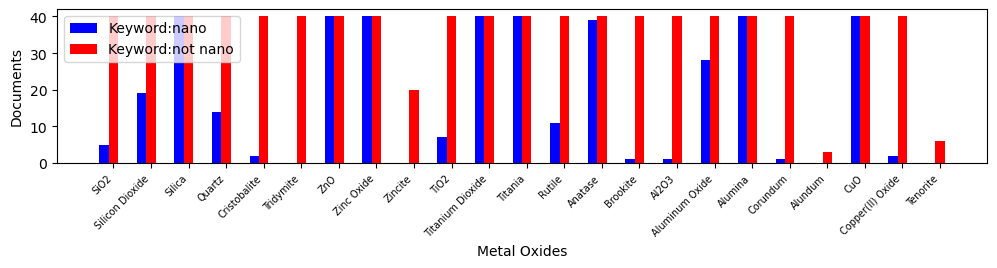

In [53]:
import matplotlib.pyplot as plt 
import numpy as np
# 플롯
fig, ax = plt.subplots(figsize=(12, 2))
bar_width = 0.25
lis = [nanocount, notnanocount]
index = np.arange(len(notnanonames))
colors = ['blue', 'red']
# , 'red'
for i, (model_name, color) in enumerate(zip(["Keyword:nano", "Keyword:not nano"], colors)):
    means_list = lis[i]
    # stds_list = [stds[metric][model_name] for metric in metrics]
    ax.bar(index + i * bar_width, means_list, bar_width,  capsize=5, label=model_name, color=color)
ax.set_xlabel('Metal Oxides')
ax.set_ylabel('Documents')
ax.legend(loc='upper left')
# ax.set_title('Evaluation Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(nanonames,rotation=45, ha='right', fontsize=7)
fig.savefig("./a.png")